# hidden layer의 node 수 : 128

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
learning_rate = 0.01
total_epoch = 20
batch_size = 100
n_hidden = 128
n_input = 28 * 28

In [3]:
X = tf.placeholder(tf.float32, [None, n_input])

In [4]:
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

In [6]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

In [7]:
cost = tf.reduce_mean(tf.pow(X-decoder,2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(100):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost = ', '{:.4f}'.
         format(total_cost / total_batch))
    
print('최적화 완료!')

Epoch: 0001 Avg. cost =  0.0624
Epoch: 0002 Avg. cost =  0.0331
Epoch: 0003 Avg. cost =  0.0276
Epoch: 0004 Avg. cost =  0.0241
Epoch: 0005 Avg. cost =  0.0214
Epoch: 0006 Avg. cost =  0.0193
Epoch: 0007 Avg. cost =  0.0179
Epoch: 0008 Avg. cost =  0.0167
Epoch: 0009 Avg. cost =  0.0159
Epoch: 0010 Avg. cost =  0.0148
Epoch: 0011 Avg. cost =  0.0140
Epoch: 0012 Avg. cost =  0.0137
Epoch: 0013 Avg. cost =  0.0134
Epoch: 0014 Avg. cost =  0.0132
Epoch: 0015 Avg. cost =  0.0131
Epoch: 0016 Avg. cost =  0.0130
Epoch: 0017 Avg. cost =  0.0129
Epoch: 0018 Avg. cost =  0.0126
Epoch: 0019 Avg. cost =  0.0125
Epoch: 0020 Avg. cost =  0.0125
Epoch: 0021 Avg. cost =  0.0124
Epoch: 0022 Avg. cost =  0.0123
Epoch: 0023 Avg. cost =  0.0121
Epoch: 0024 Avg. cost =  0.0121
Epoch: 0025 Avg. cost =  0.0120
Epoch: 0026 Avg. cost =  0.0119
Epoch: 0027 Avg. cost =  0.0119
Epoch: 0028 Avg. cost =  0.0118
Epoch: 0029 Avg. cost =  0.0118
Epoch: 0030 Avg. cost =  0.0116
Epoch: 0031 Avg. cost =  0.0113
Epoch: 0

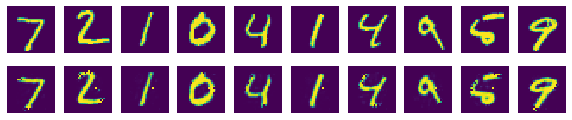

In [9]:
sample_size = 10
samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))